In [54]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt

sns.set_theme(context="paper", style="whitegrid", palette="deep")

def get_govsg_df(dataset_id: str) -> pd.DataFrame:
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + dataset_id
    response = requests.get(url).json()
    records = response["result"]["records"]
    pbar = tqdm(
        total=response["result"]["total"], desc=response["result"]["resource_id"]
    )
    pbar.update(len(response["result"]["records"]))
    while response["result"]["records"]:  # returns empty list after last row
        url = "https://data.gov.sg" + response["result"]["_links"]["next"]
        response = requests.get(url).json()
        records += response["result"]["records"]
        pbar.update(len(response["result"]["records"]))
    pbar.close()
    return pd.DataFrame(records)


# Survey data
# https://data.gov.sg/datasets/d_05fffefe9045d234eb140d7db0acdeb9/view
df = get_govsg_df("d_05fffefe9045d234eb140d7db0acdeb9")
df.head()

d_05fffefe9045d234eb140d7db0acdeb9: 100%|██████████| 3076/3076 [00:10<00:00, 288.57it/s]


,_id,uid,sample,gender,age_2,dwelling,industry,social_involve_1,social_involve_2,social_involve_3,...,hh_employer_their_family,hh_grandchildren,hh_other,hh_none,highest_ed,institution_deg,occupation,mhi,mpi,weight
0,1,27,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,...,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,"Sales and service staff (e.g. Chefs, Cooks, Ca...","S$3,001-S$4,000","Below S$1,000",0.727891904
1,2,33,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,...,No,No,No,No,Polytechnic / diploma,-,Self-employed / Freelancer,"S$2,001-S$3,000","S$1,000-2,000",0.855263478
2,3,46,Resident (Citizen/PR),Female,45-54 years old,HDB 4 room,Not currently working,No,No,No,...,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,Home maker,"S$3,001-S$4,000",-,0.857862718
3,4,50,Resident (Citizen/PR),Male,55-64 years old,HDB 4 room,Not currently working,No,No,No,...,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,Unemployed,"S$4,001-S$5,000",-,1.000318165
4,5,52,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,...,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,"Clerical support workers (e.g. Clerks, Custome...","S$6,001-S$7,000","S$2,001-S$3,000",0.855263478


In [55]:
# Column descriptions
# https://data.gov.sg/datasets/d_6b8a71d993dec5e5096cf1dd9befc1a2/view
df_desc = get_govsg_df("d_6b8a71d993dec5e5096cf1dd9befc1a2")
df_desc.head()

d_6b8a71d993dec5e5096cf1dd9befc1a2: 100%|██████████| 120/120 [00:00<00:00, 180.20it/s]


,_id,var_name,var_label
0,1,uid,UID. Unique respondent ID
1,2,sample,Sample. Sample type
2,3,gender,Gender. Gender
3,4,age_2,Age_2. Age groups
4,5,dwelling,Dwelling. Dwelling type


In [56]:
# cleaning the outcome_future column
df["outcome_future"] = df["outcome_future"].str.replace(
    "10 - I have a strong desire to be a part of shaping Singapore’s future", "10"
)
df["outcome_future"] = df["outcome_future"].str.replace(
    "0 - I don’t want to have any part of shaping Singapore’s future", "0"
)
df["outcome_future"] = df["outcome_future"].astype(int)

In [98]:
# cleaning the outcome_connection column
df["outcome_connection"] = df["outcome_connection"].str.replace("10 - Very strong", "10")
df["outcome_connection"] = df["outcome_connection"].str.replace("0 - Not strong at all", "0")
df["outcome_connection"] = df["outcome_connection"].astype(int)

In [57]:
# cleaning the pillar columns
pillar_columns = [
    "pillarbeh_1",
    "pillarbeh_2",
    "pillarbeh_3",
    "pillarbeh_4",
    "pillarbeh_5",
    "pillarbeh_6",
    "pillarbeh_7",
    "pillarbeh_8",
    "pillarbeh_9",
    "pillarbeh_10",
    "pillarbeh_11",
    "pillarbeh_12",
    "pillarbeh_13",
    "pillarbeh_14",
    "pillarbeh_15",
    "pillarvals_1",
    "pillarvals_2",
    "pillarvals_3",
    "pillarvals_4",
    "pillarvals_5",
    "pillarvals_6",
    "pillarvals_7",
    "pillarvals_8",
    "pillarvals_9",
    "pillarvals_12",
    "pillarvals_13",
    "pillarvals_14",
    "pillarvals_21",
    "pillarvals_22",
    "pillarvals_23",
    "pillarvals_24",
    "pillarvals_25",
    "pillarvals_26",
    "pillarvals_29",
    "pillarvals_30",
    "pillarvals_31",
    "pillarvals_32",
    "pillarvals_33",
]
for c in pillar_columns:
    df[c] = df[c].str.replace("10 - Strongly agree", "10")
    df[c] = df[c].str.replace("0 - Do not agree at all", "0")
    df[c] = df[c].astype(int)

In [58]:
# cleaning the support columns
support_columns = [
    "support_immedfam",
    "support_extfam",
    "support_worksch",
    "support_friends",
]
for c in support_columns:
    df[c] = df[c].str.replace("10 - A lot", "10")
    df[c] = df[c].str.replace("0 - Not at all", "0")
    df[c] = df[c].astype(int)

In [ ]:
# replace missing values with the proper representation
df.replace("-", np.nan, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7868\3146414473.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x="outcome_future", hue="dwelling", cut=0, common_norm=False)


<Axes: xlabel='outcome_future', ylabel='Density'>

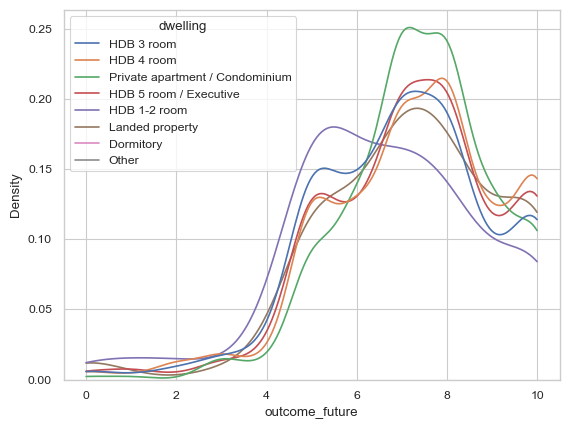

In [111]:
sns.kdeplot(df, x="outcome_future", hue="dwelling", cut=0, common_norm=False)

<Axes: xlabel='dwelling', ylabel="[Outcome_Future. Strength of desire to be a part of shaping SG's future]">

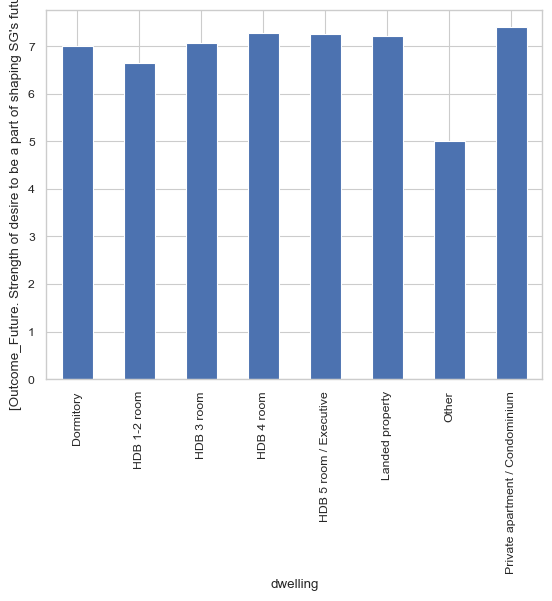

In [61]:
ylabel = df_desc[df_desc["var_name"]=="outcome_future"]["var_label"]
df.groupby("dwelling").outcome_future.mean().plot(kind="bar", ylabel=ylabel)

<Axes: xlabel='age_2'>

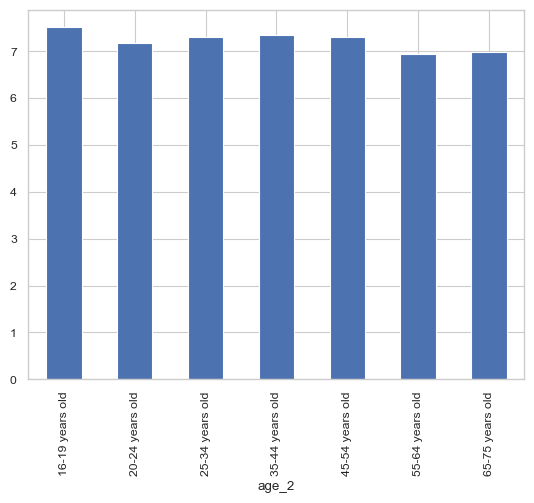

In [62]:
df.groupby("age_2").outcome_future.mean().plot(kind="bar")

<Axes: xlabel='marital_stats'>

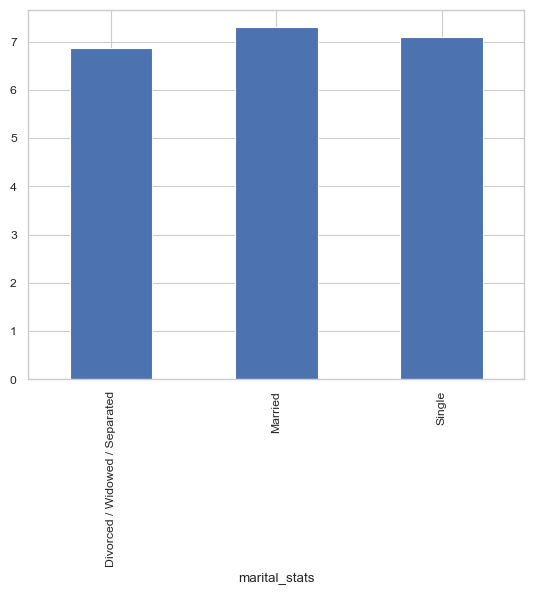

In [63]:
df.groupby("marital_stats").outcome_future.mean().plot(kind="bar")

<Axes: xlabel='outcome_future', ylabel='Density'>

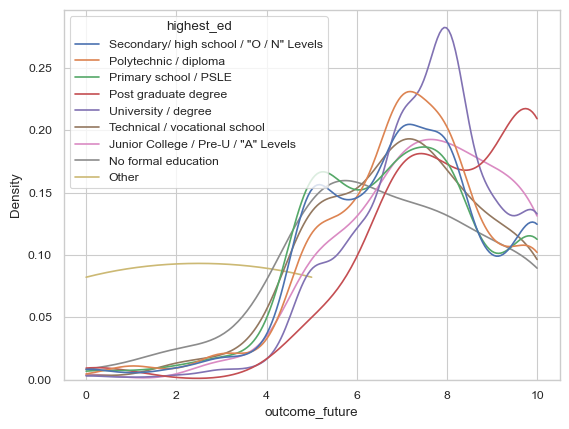

In [96]:
sns.kdeplot(df, x="outcome_future", hue="highest_ed", cut=0, common_norm=False)

<Axes: xlabel='outcome_future', ylabel='highest_ed'>

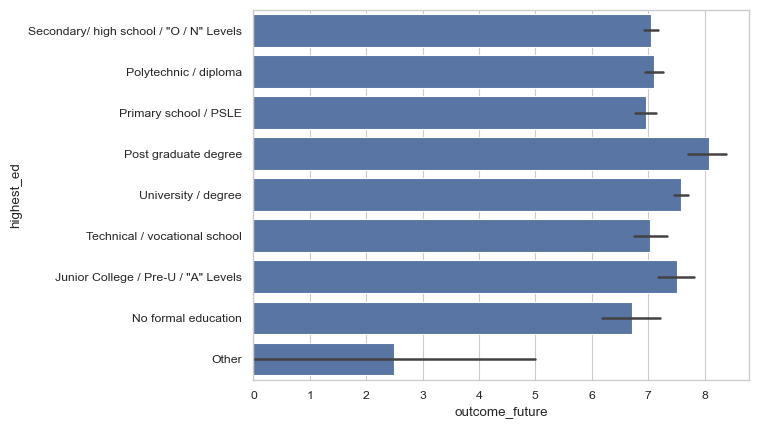

In [65]:
sns.barplot(df, x="outcome_future", y="highest_ed")

Text(0.5, 0, 'Support_worksch. Perceived support received from workplace/school')

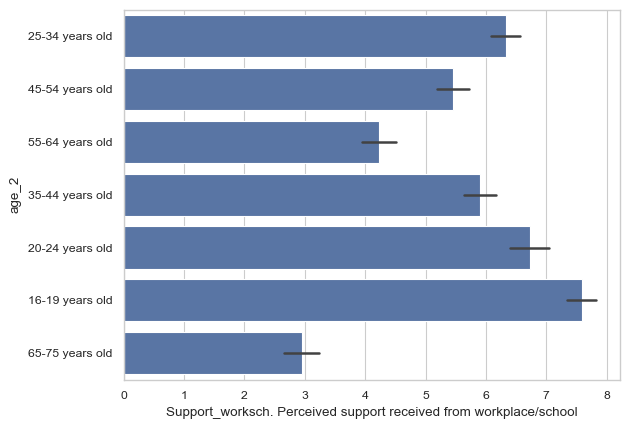

In [66]:
ax = sns.barplot(df, x="support_worksch", y="age_2")
ax.set_xlabel(df_desc[df_desc["var_name"]=="support_worksch"]["var_label"].iloc[0])

<Axes: xlabel='outcome_future', ylabel='social_involve_5'>

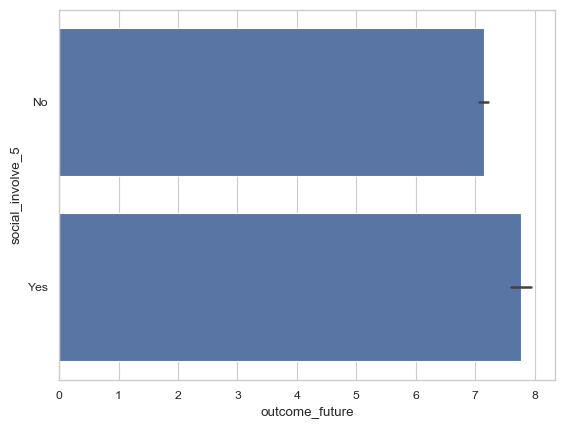

In [88]:
sns.barplot(df, x="outcome_future", y="social_involve_5")

<Axes: xlabel='highest_ed', ylabel='age_2'>

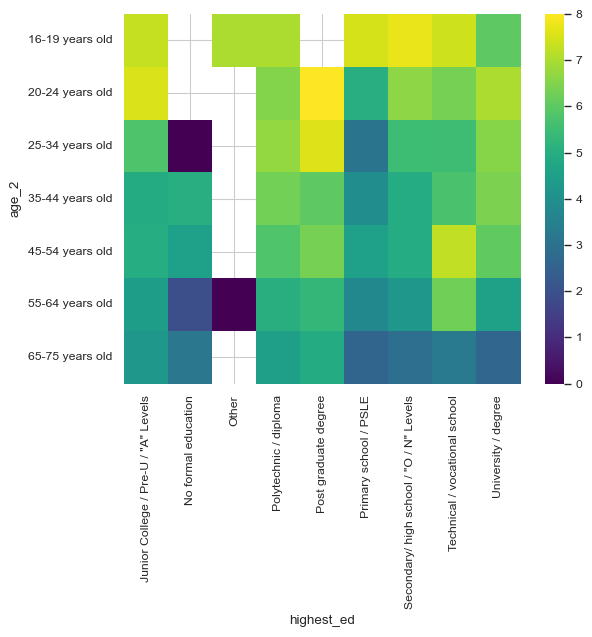

In [106]:
df_plot = df.pivot_table(values="support_worksch", index="age_2", columns="highest_ed", aggfunc="mean")
sns.heatmap(df_plot, cmap="viridis")

<Axes: xlabel='support_worksch', ylabel='industry'>

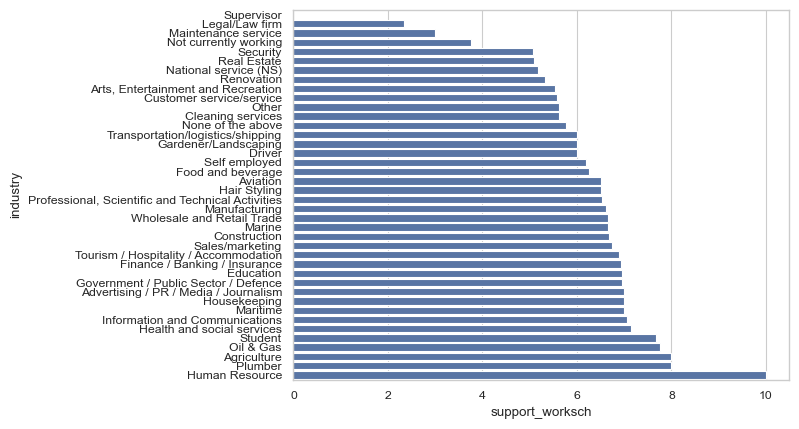

In [69]:
df_plot = pd.DataFrame(df.groupby("industry")["support_worksch"].mean().sort_values())
sns.barplot(df_plot, x="support_worksch", y="industry")

<Axes: xlabel='support_friends', ylabel='support_immedfam'>

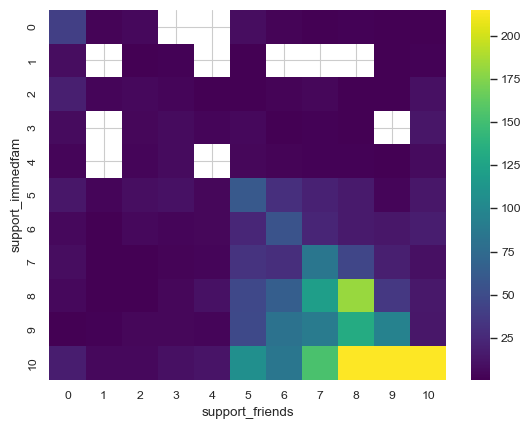

In [70]:
df_plot = df.pivot_table(values="sample", index="support_immedfam", columns="support_friends", aggfunc="count")
sns.heatmap(df_plot, cmap="viridis", robust=True)

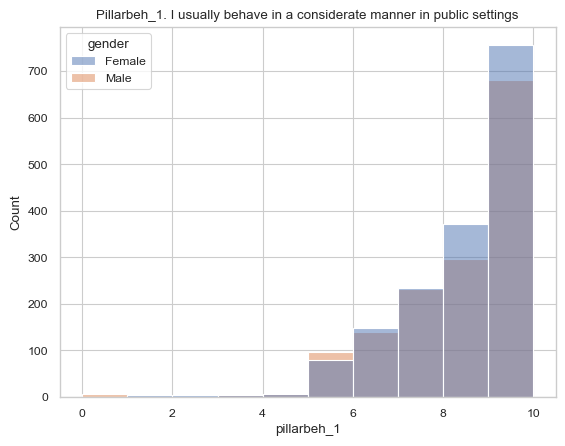

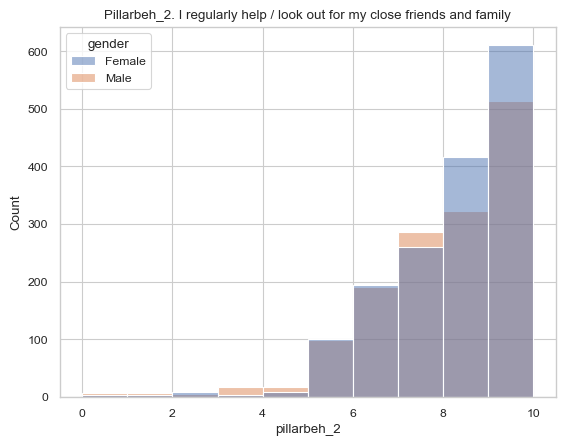

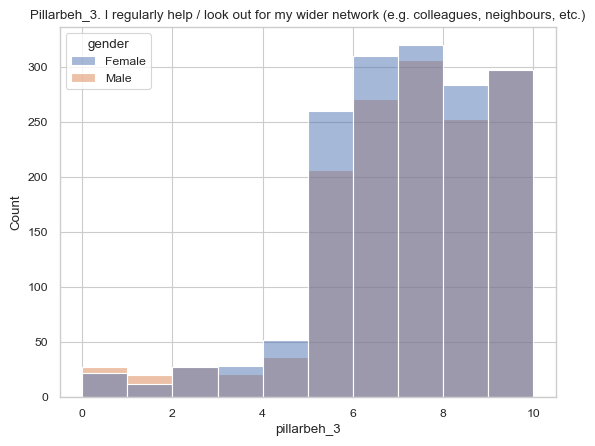

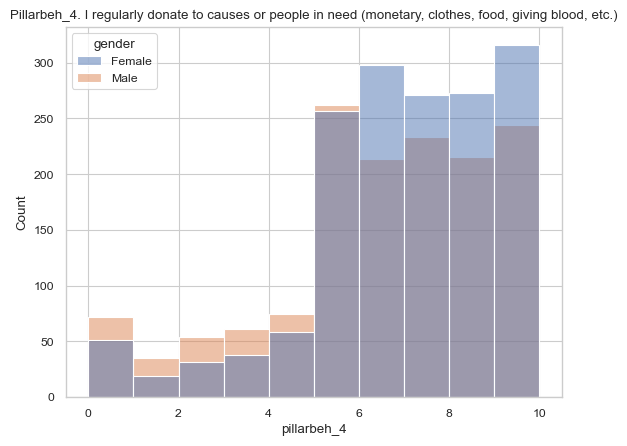

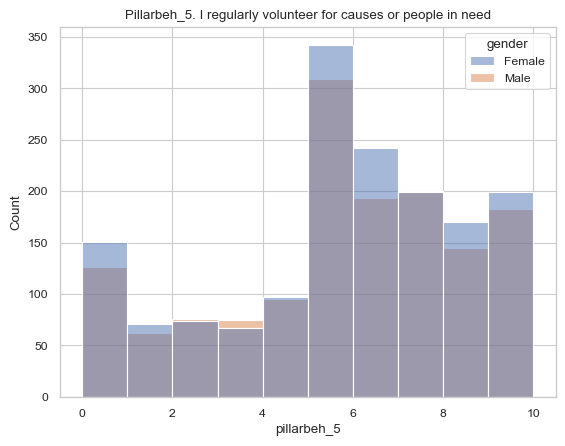

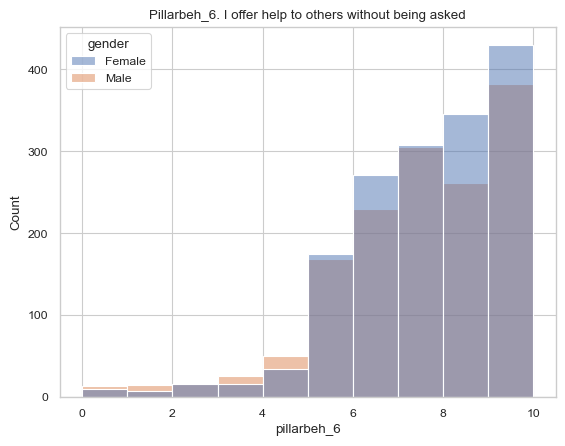

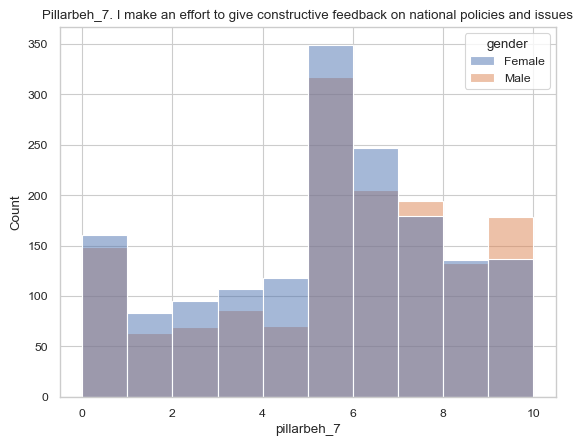

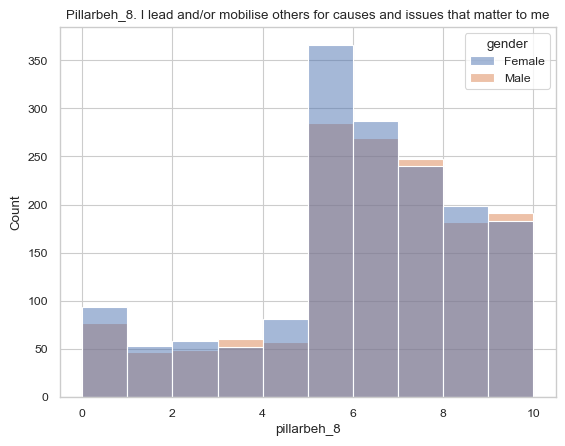

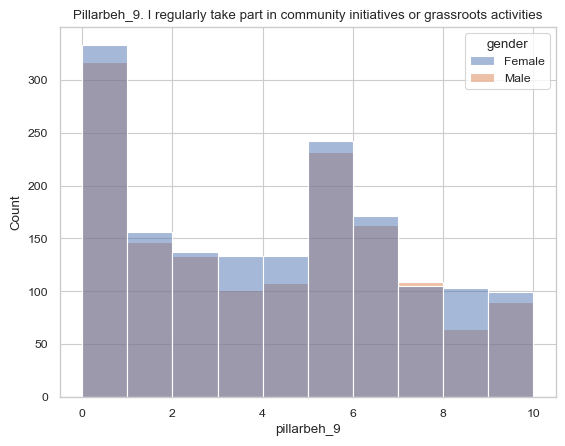

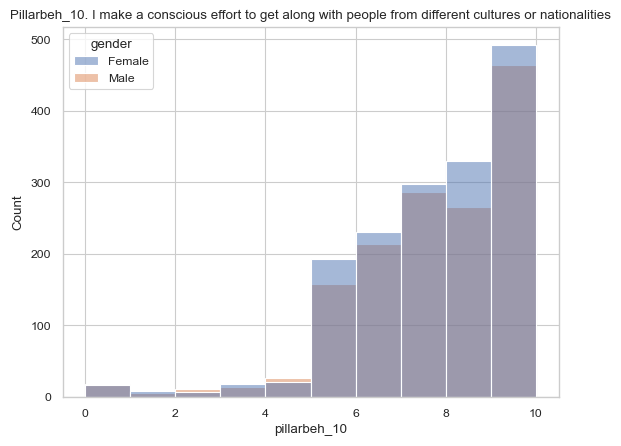

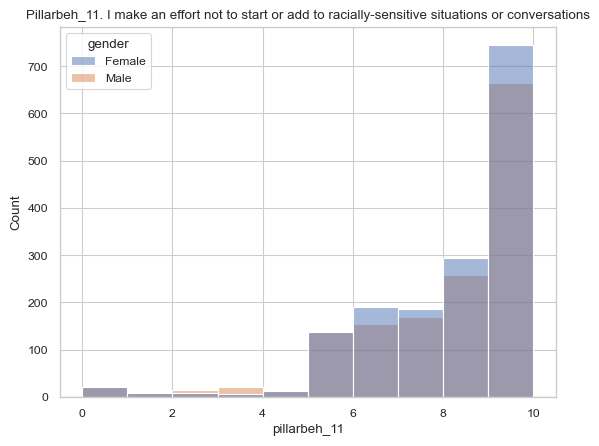

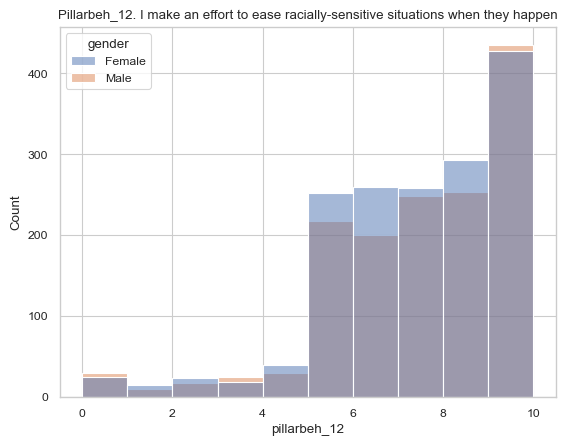

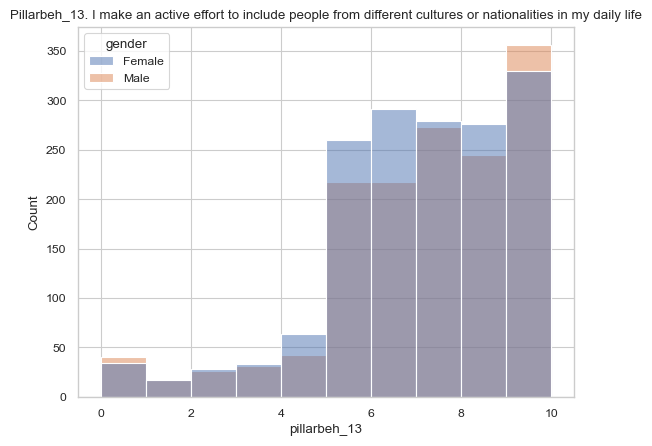

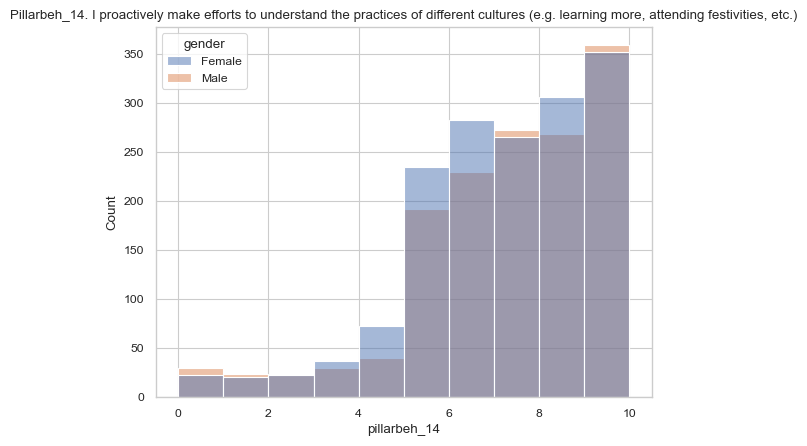

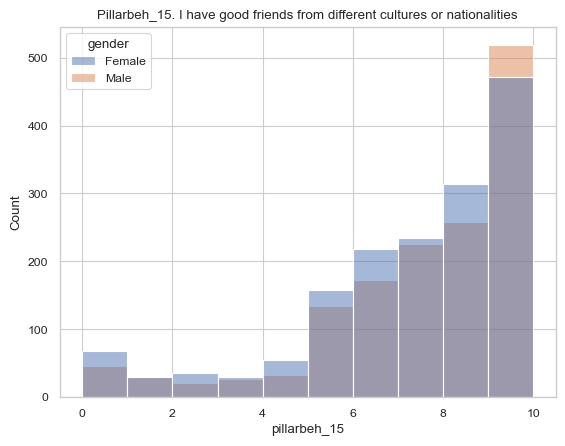

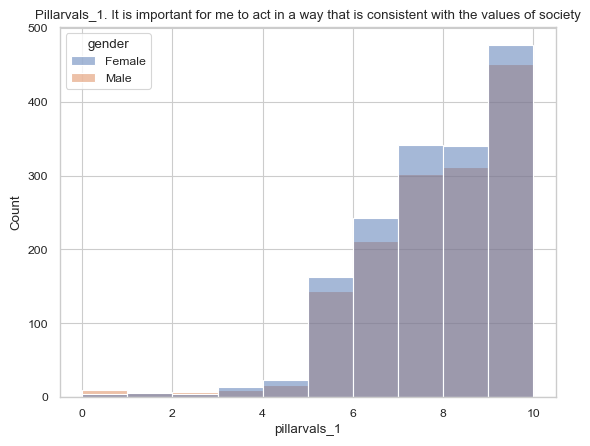

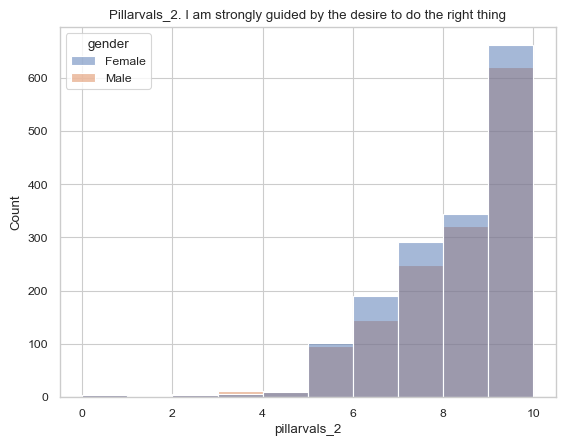

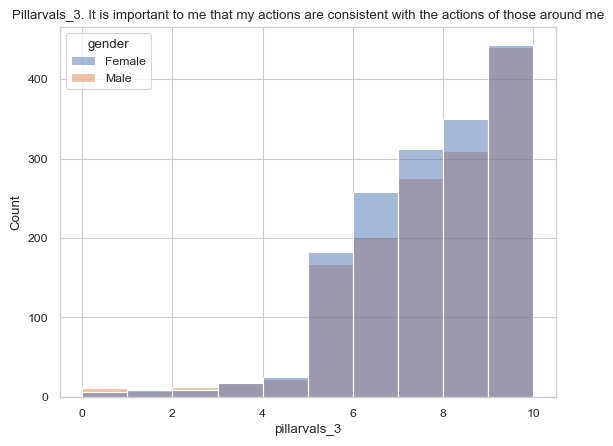

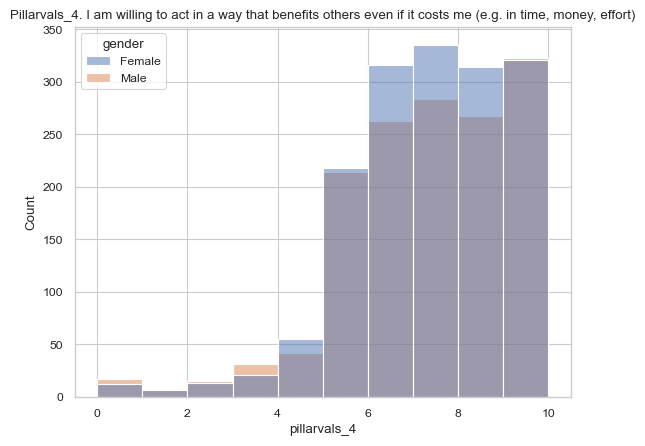

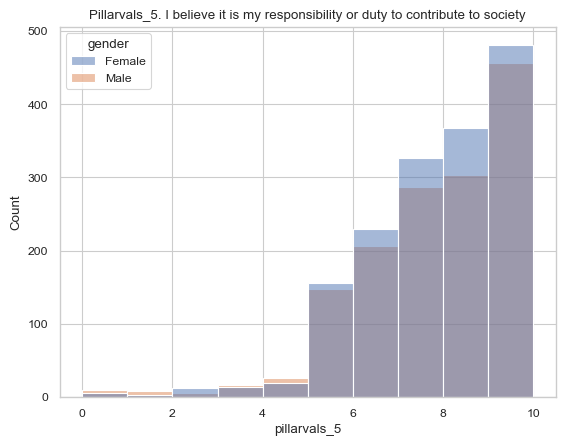

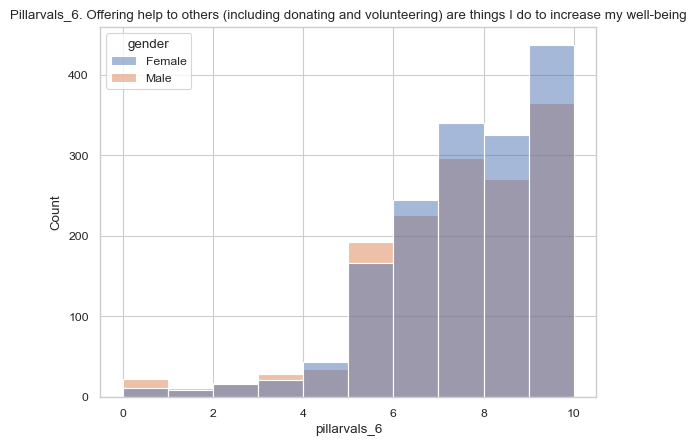

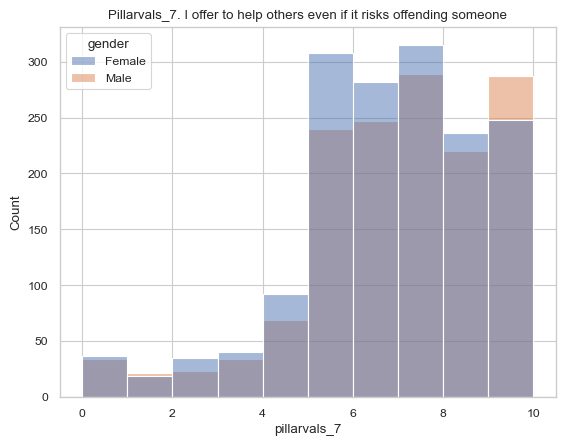

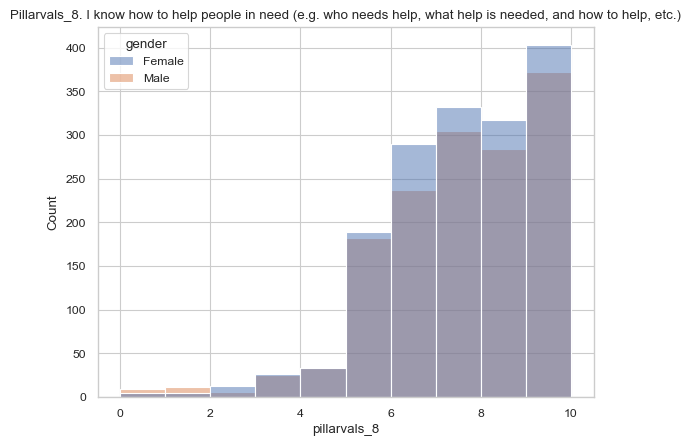

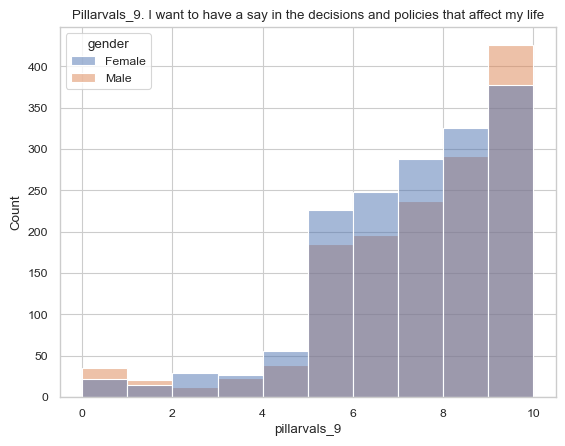

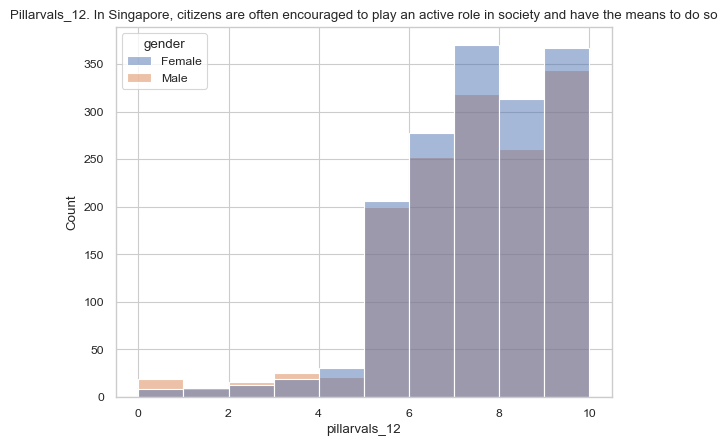

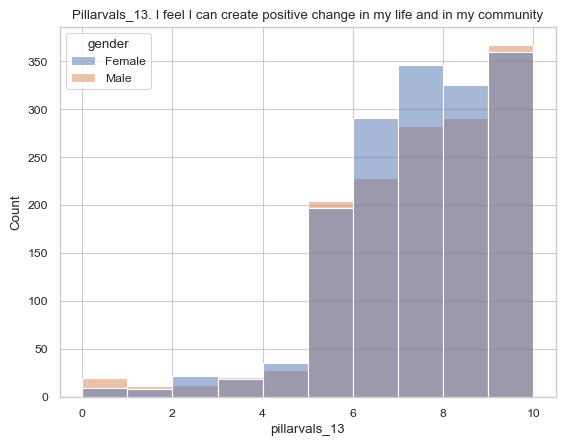

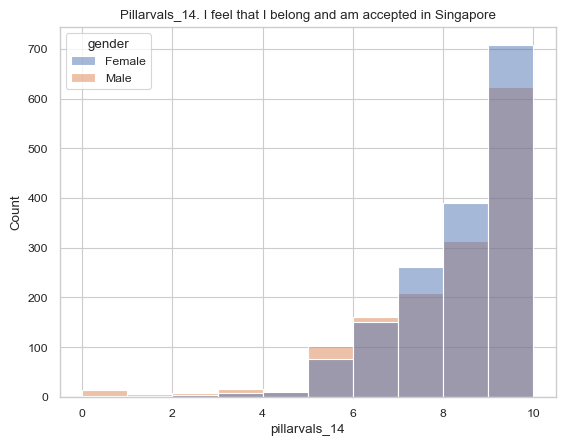

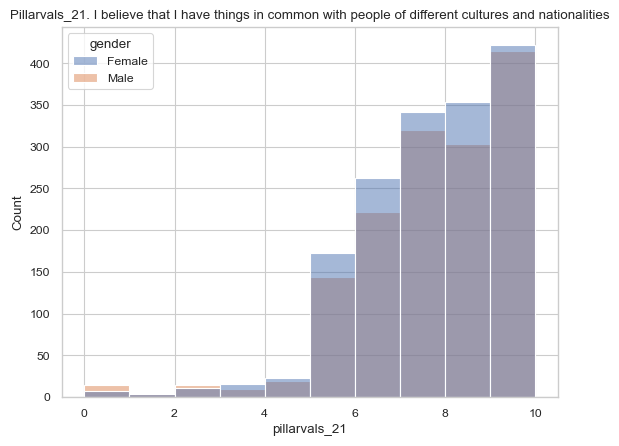

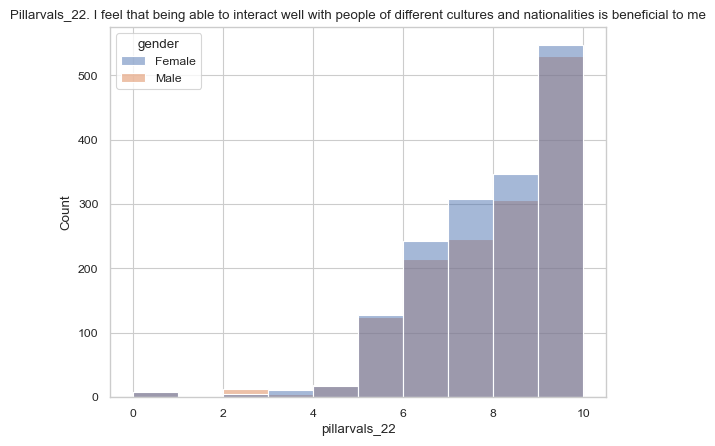

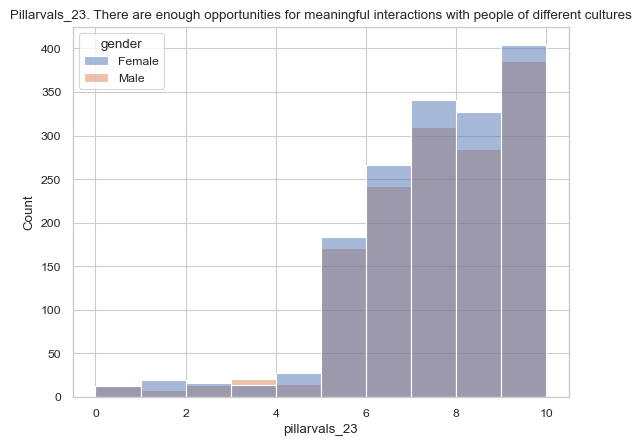

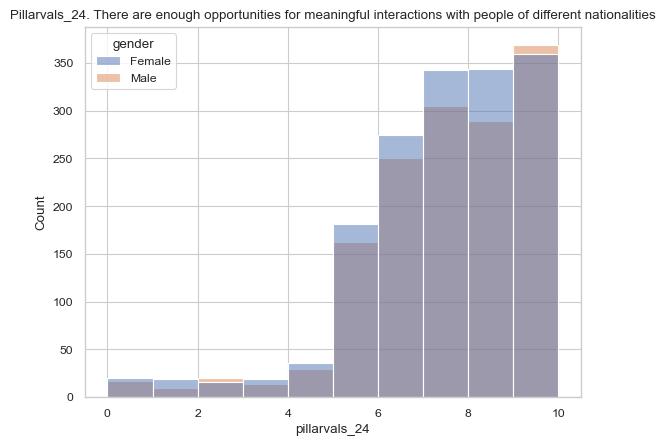

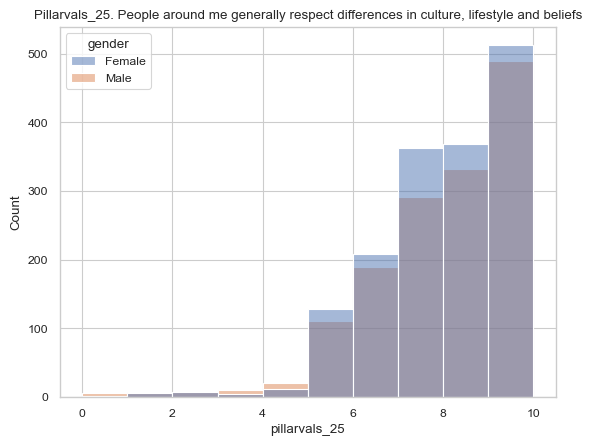

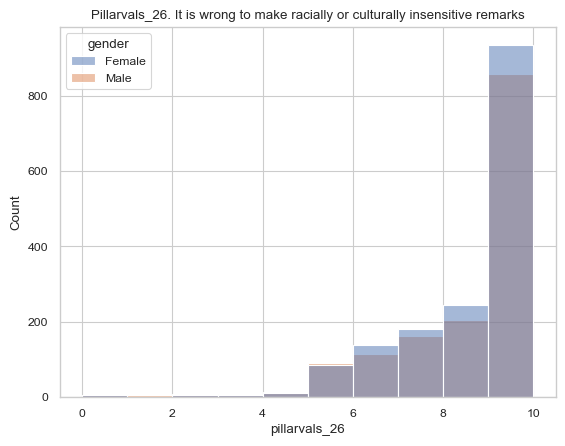

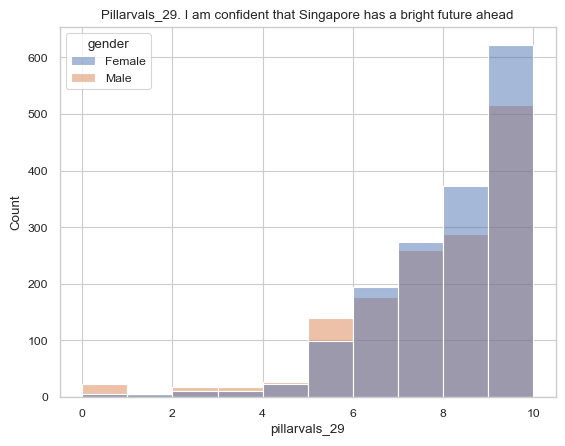

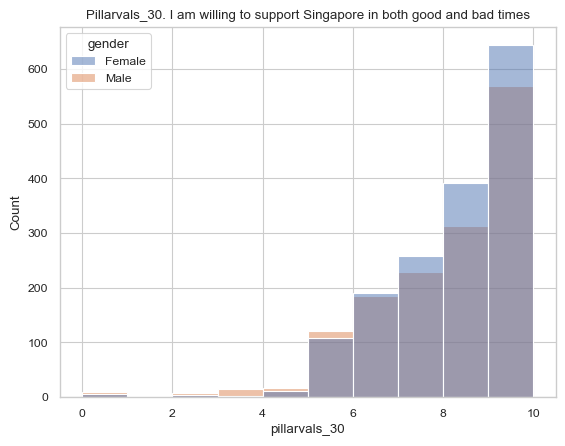

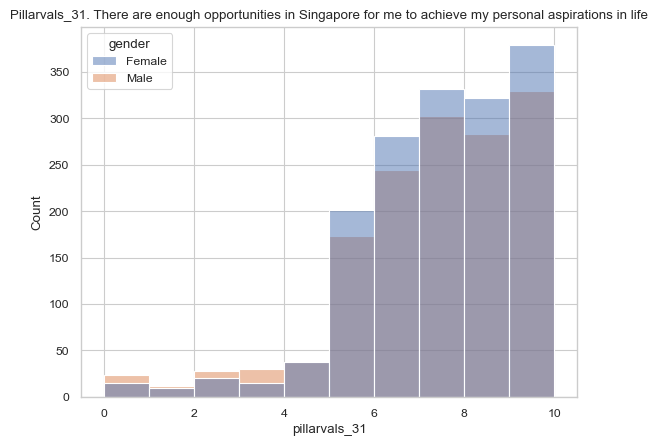

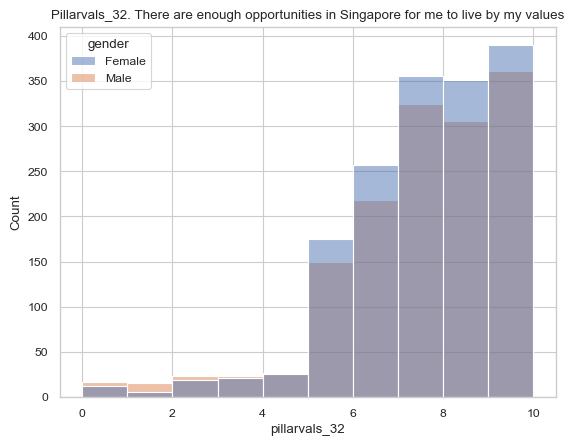

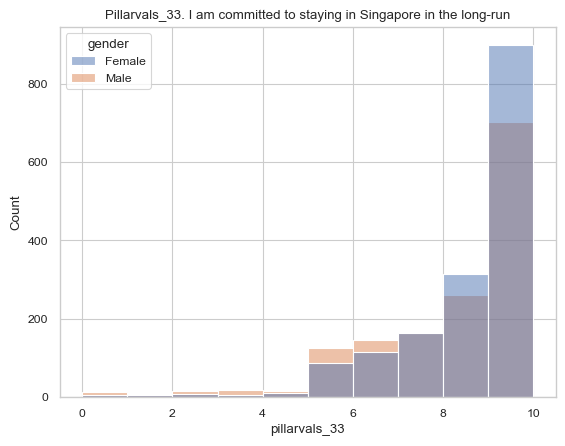

In [83]:
for c in pillar_columns:
    title = df_desc[df_desc["var_name"]==c]["var_label"].iloc[0]
    ax = sns.histplot(df, x=c, hue="gender", bins=10)
    ax.set_title(title)
    plt.show()

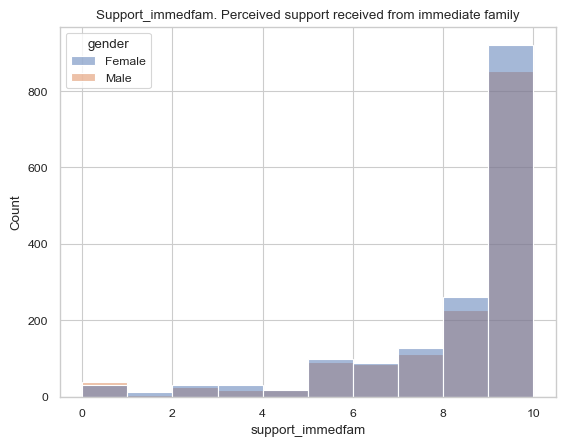

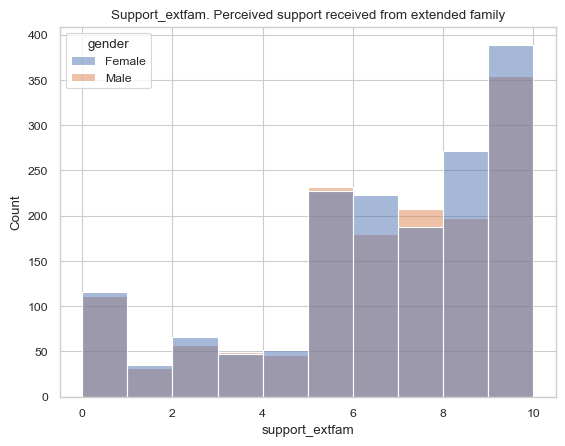

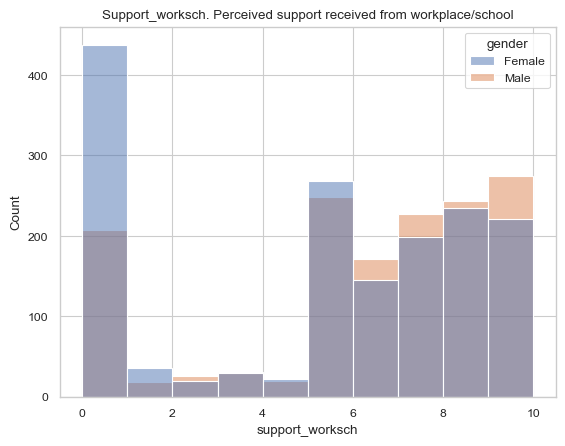

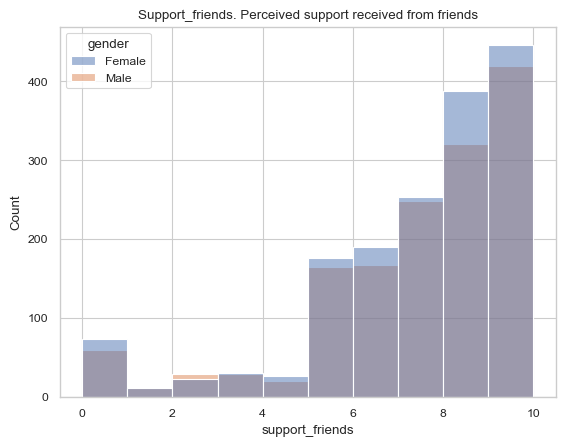

In [81]:
for c in support_columns:
    title = df_desc[df_desc["var_name"]==c]["var_label"].iloc[0]
    ax = sns.histplot(df, x=c, hue="gender", bins=10)
    ax.set_title(title)
    plt.show()

<Axes: xlabel='online_sharemedia', ylabel='Count'>

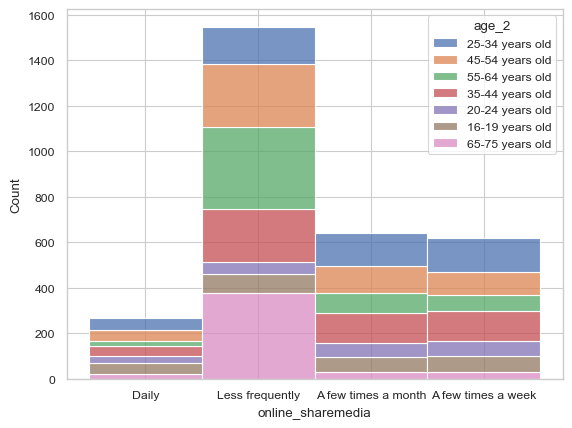

In [86]:
sns.histplot(df, x="online_sharemedia", hue="age_2", multiple="stack")

<Axes: xlabel='outcome_connection', ylabel='Density'>

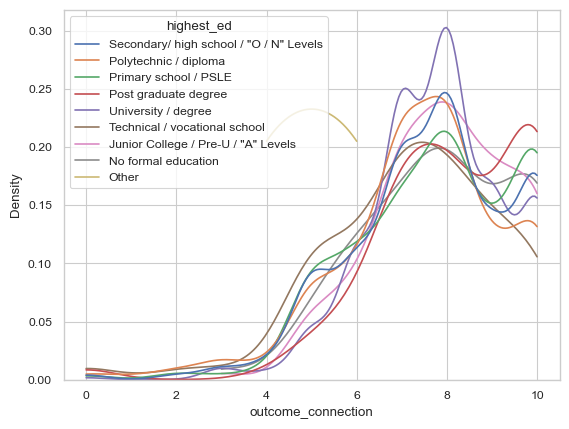

In [103]:
sns.kdeplot(df, x="outcome_connection", hue="highest_ed", cut=0, common_norm=False)

<Axes: xlabel='outcome_connection', ylabel='outcome_future'>

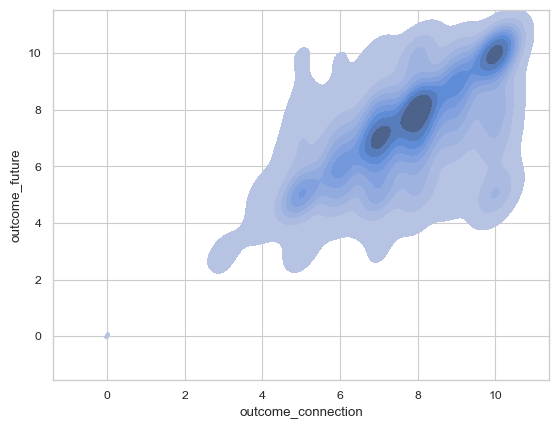

In [113]:
sns.kdeplot(df, x="outcome_connection", y="outcome_future", fill=True)